# First Trial on Lunar Occultation Light Curve Modeling with Python

Hello,
in this first notebook, I will try to explain how I try to make a code for LO light curve fitting with Python.

First, do all the needed imports

In [1]:
%matplotlib inline
import numpy as np
import math
import scipy.optimize as opt
import scipy.special as spc
import matplotlib.pyplot as plt

then, we read the input file. Inside the file, there are three columns which are wavelength, weighting value #1 and weighting value #2 for first, second, and third column respectively and assign them into pjgGel, weight1 and weight2.

In [2]:
pjgGel, weight1, weight2 = np.loadtxt('transcurveb.txt', unpack=True)

For x-axis, we assign a range and divide it into smaller value. Then, the weighted wavelength values are the original value of wavelength taken from input file times the weighted values.

In [3]:
x = np.linspace(-100., 100., 50000)
pjgGel_weight = pjgGel * weight1

We create a 2D array to incorporate the result which are values of the Fresnel integral.

In [4]:
n = len(x)
m = len(pjgGel_weight)

result = np.zeros((n, m))

The Fresnel integral function is given by Python package **scipy.special** and we divide this function into its sine and cosine function.

In [5]:
for i in range (m):
    for j in range (n):
        w = x[j] * 1e10 * math.sqrt(2. / (pjgGel_weight[i] * 3.84e18))
        s, c = spc.fresnel(w)
        result[j, i] = 0.5 * (0.5 + s + 0.5 + c) ** 2
total_res = result.sum(axis = 1)

and then we plot the result

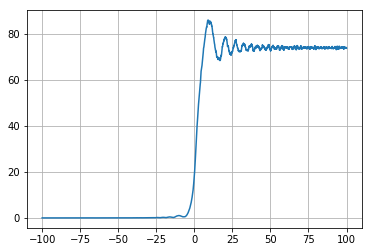

In [6]:
plt.plot(x, total_res)
plt.grid(True)
# plt.show()

We can compare it with a monochromatic source. For example, we pick a source and observe it at 15000 \AA

In [7]:
pjgGel_tes = 15000.

result2 = np.zeros((n, m))

for i in range (m):
    for j in range (n):
        w2 = x[j] * 1e10 * math.sqrt(2. / (pjgGel_tes * 3.84e18))
        s2, c2 = spc.fresnel(w2)
        result2[j, i] = 0.5 * (0.5 + s2 + 0.5 + c2) ** 2
total_res2 = result2.sum(axis = 1)

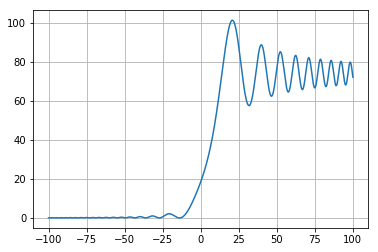

In [8]:
plt.plot(x, total_res2)
plt.grid(True)

We also can superimpose those two plots to be able to see the differences clearly. The wavelength range 'smoothing out' the diffraction pattern.

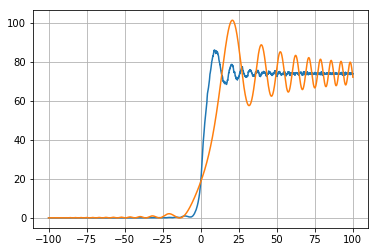

In [9]:
plt.plot(x, total_res)
plt.plot(x, total_res2)
plt.grid(True)